<h1>Exemplo de classificação de texto com Sklearn</h1>

In [120]:
import json

raw_file = open('datasets/reviews.json', 'r', encoding='utf-8').read()
as_json = json.loads(raw_file)
num_texts = len(as_json['paper'])

print(num_texts)

172


In [121]:
#Observando os dados

entries = [j for j in as_json['paper']]
entries[0]

{'id': 1,
 'preliminary_decision': 'accept',
 'review': [{'confidence': '4',
   'evaluation': '1',
   'id': 1,
   'lan': 'es',
   'orientation': '0',
   'remarks': '',
   'text': '- El artículo aborda un problema contingente y muy relevante, e incluye tanto un diagnóstico nacional de uso de buenas prácticas como una solución (buenas prácticas concretas). - El lenguaje es adecuado.  - El artículo se siente como la concatenación de tres artículos diferentes: (1) resultados de una encuesta, (2) buenas prácticas de seguridad, (3) incorporación de buenas prácticas. - El orden de las secciones sería mejor si refleja este orden (la versión revisada es #2, #1, #3). - El artículo no tiene validación de ningún tipo, ni siquiera por evaluación de expertos.',
   'timespan': '2010-07-05'},
  {'confidence': '4',
   'evaluation': '1',
   'id': 2,
   'lan': 'es',
   'orientation': '1',
   'remarks': '',
   'text': 'El artículo presenta recomendaciones prácticas para el desarrollo de software seguro. S

In [122]:
import numpy as np

texts = [' '.join([x['text'] for x in j['review']]) for j in entries]
classifications = [j['preliminary_decision'] for j in entries]

class_set = list(set(classifications))
print('SET classifications', class_set)

numeric_classifications = [class_set.index(c) for c in classifications]

Y = np.array(numeric_classifications).ravel()

SET classifications ['accept', 'no decision', 'reject', 'probably reject']


<h3>Criação de features numéricas</h3>

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_1 = CountVectorizer()
vectorizer_2 = TfidfVectorizer()

X_1 = vectorizer_1.fit_transform(texts)
X_2 = vectorizer_2.fit_transform(texts)

Exemplo

In [124]:
X_1[0]

<1x6704 sparse matrix of type '<class 'numpy.int64'>'
	with 192 stored elements in Compressed Sparse Row format>

In [125]:
X_1[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [126]:
np.sum(X_1[0].todense())

363

<h3>Teste dos classificadores</h3>

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y, 
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True,
                                                    random_state=42)

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y, 
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True,
                                                    random_state=42)

model1_1 = GaussianNB()
model1_2 = GaussianNB()
model2_1 = LogisticRegression()
model2_2 = LogisticRegression()
model3_1 = MLPClassifier((10,), activation='logistic')
model3_2 = MLPClassifier((10,), activation='logistic')

model1_1.fit(X_train_1.todense(), Y_train_1)
model1_2.fit(X_train_2.todense(), Y_train_2)
model2_1.fit(X_train_1, Y_train_1)
model2_2.fit(X_train_2, Y_train_2)
model3_1.fit(X_train_1, Y_train_1)
model3_2.fit(X_train_2, Y_train_2)

accuracy1_1 = model1_1.score(X_test_1.todense(), Y_test_1)
accuracy1_2 = model1_2.score(X_test_2.todense(), Y_test_2)
accuracy2_1 = model2_1.score(X_test_1, Y_test_1)
accuracy2_2 = model2_2.score(X_test_2, Y_test_2)
accuracy3_1 = model3_1.score(X_test_1, Y_test_1)
accuracy3_2 = model3_2.score(X_test_2, Y_test_2)

print('Accuracy GaussianNB + CountVectorizer', accuracy1_1)
print('Accuracy GaussianNB + Tfidf', accuracy1_2)
print('Accuracy LogisticRegression + CountVectorizer', accuracy2_1)
print('Accuracy LogisticRegression + Tfidf', accuracy2_2)
print('Accuracy MLPClassifier + CountVectorizer', accuracy3_1)
print('Accuracy MLPClassifier + Tfidf', accuracy3_2)

/Users/fnba/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy GaussianNB + CountVectorizer 0.5384615384615384
Accuracy GaussianNB + Tfidf 0.5192307692307693
Accuracy LogisticRegression + CountVectorizer 0.7115384615384616
Accuracy LogisticRegression + Tfidf 0.6730769230769231
Accuracy MLPClassifier + CountVectorizer 0.6730769230769231
Accuracy MLPClassifier + Tfidf 0.6730769230769231


<h2>Atividade: Substitua a representacao bag of words pela proporcao de cada palavra e realize os testes</h2>

<h2>Atividade: Crie um classificador para diferenciar pessoas fisicas ou juridicas</h2>

<h2>Atividade: Encontrar as palavras com maior ganho de informação</h2>

<h2>Atividade: Tentar melhorar o desempenho do classificador</h2>

<h1>Nltk</h1>

<a href="https://www.nltk.org/book/">Referência sobre Nltk</a>

O Nltk é uma biblioteca para processamento de texto natural em python. Com ela é possível realizar classificação de textos, treinar chunkers, entre outros

In [10]:
# -*- coding: utf-8 -*-

import nltk

Primeiramente, uma função bastante útil para o processamento de textos em português

In [66]:
from unicodedata import normalize

def normalize_text(text, to_lower=True):
    text = normalize('NFKD', text).encode('ASCII', 'ignore')

    final_text = text

    if to_lower:
        final_text = text.lower()
        
    return final_text.decode("utf-8")

In [67]:
print(normalize_text('OlÁ, tudo bem? como você vai?'))
print(normalize_text('Olá, tudo bem? como você vai?', to_lower=False))

ola, tudo bem? como voce vai?
Ola, tudo bem? como voce vai?


Ao realizar a normalização de textos, considere excluir casos como o verbo de ligação "é" e o símbolo de parágrafo &para;

<h2>Baixando corpora e pacotes úteis</h2
<br><br>
Vamos agora baixar exemplos de textos em português para trabalhar e alguns pacotes que serão úteis

In [ ]:
#Baixar: book
#Baixar: all-corpora
#Baixar: floresta
#Baixar: machado
#Baixar: punkt
#Baixar: stopwords

#Se houverem problemas com a interface. Abrir o terminal do Jupyter e inserir os comandos:
#python -m nltk downloader book
#python -m nltk downloader all-corpora
#python -m nltk.downloader floresta
#python -m nltk.downloader machado
#python -m nltk.downloader punkt
#python -m nltk.downloader stopwords

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


<h3>Carregando texto e funções úteis do NLTK</h3>

In [154]:
import nltk

f = open('datasets/machado.txt', 'r').read()

In [160]:
f[:100]

'A Cartomante HAMLET observa a Horácio que há mais cousas no céu e na terra do que sonha a nossa filo'

In [162]:
tokens = nltk.word_tokenize(f)
my_txt = nltk.Text(tokens)
my_txt

<Text: A Cartomante HAMLET observa a Horácio que há...>

<h3>Fazendo pesquisas textuais</h3>

In [163]:
my_txt.concordance('observa')

Displaying 1 of 1 matches:
 observa a Horácio que há mais cousas no céu


In [164]:
my_txt.concordance('olhos')

Displaying 2 of 2 matches:
te sem demora , — repetia ele com os olhos no papel . Imaginariamente , viu a p
avras estavam decoradas , diante dos olhos , fixas , ou então , — o que era ain


<h3>Obtendo a distribuição de palavras</h3>

In [182]:
from nltk.probability import FreqDist
fd = FreqDist(my_txt)

In [183]:
fd['olhos']

2

In [186]:
fd

FreqDist({',': 177, '.': 83, 'que': 58, 'a': 55, 'e': 51, 'de': 42, 'o': 29, ';': 26, 'Camilo': 20, 'as': 16, ...})

<h3>Encontrando um texto dentro de outro</h3>

In [189]:
import re
txt1 = 'Este eh um texto onde a palavra texto acontece mais de uma vez'
[(x.start(), x.end()) for x in re.finditer('texto', txt1)]

[(11, 16), (32, 37)]

<h3>Stopwords em português</h3>

In [152]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para']

<h2>Segmentação de texto</h2>

<h3>Tokenização</h3>
<br>
Tokenização é o processo de dividir uma frase em palavras particulares


In [46]:
nltk.word_tokenize('meu nome é felipe navarro')

['meu', 'nome', 'é', 'felipe', 'navarro']

<h3>Segmentação em sentenças (sent tokenization)</h3>
<br>
É o processo de quebrar um texto grande em frases individuais


In [52]:
sent_tokenizer=nltk.data.load('tokenizers/punkt/portuguese.pickle')

texto = 'Meu nome é João da Silva e gosto de passear no feriado. Recentemente comprei um carro, que quebrou ontem'

sent_tokenizer.tokenize(texto)


['Meu nome é João da Silva e gosto de passear no feriado.',
 'Recentemente comprei um carro, que quebrou ontem']

In [53]:
#Para simplificar vamos criar funções

def tokens(my_str):
    return nltk.word_tokenize(my_str)

def sent_seg(my_str):
    return sent_tokenizer.tokenize(texto)

<h3>Stemming em portugues</h3>

In [134]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem("copiar")

'copi'

<h2>Funções úteis em portugues com spacy</h2>

In [147]:
#Rodar o comando pip install spacy
#Rodar o comando python -m spacy download pt
import spacy
nlp = spacy.load('pt')
my_doc = nlp('Encontrarei você no mesmo lugar onde ele estava. Tudo bem?')

<h3>Separação em tokens</h3>

In [141]:
my_doc.text.split()

['Encontrarei',
 'você',
 'no',
 'mesmo',
 'lugar',
 'onde',
 'ele',
 'estava.',
 'Tudo',
 'bem?']

In [149]:
[token.orth_ for token in my_doc]

['Encontrarei',
 'você',
 'no',
 'mesmo',
 'lugar',
 'onde',
 'ele',
 'estava',
 '.',
 'Tudo',
 'bem',
 '?']

<h3>Classificação sintática com spacy</h3>

In [148]:
[(token.orth_, token.pos_) for token in my_doc]

[('Encontrarei', 'VERB'),
 ('você', 'PRON'),
 ('no', 'VERB'),
 ('mesmo', 'DET'),
 ('lugar', 'NOUN'),
 ('onde', 'ADV'),
 ('ele', 'PRON'),
 ('estava', 'VERB'),
 ('.', 'PUNCT'),
 ('Tudo', 'PRON'),
 ('bem', 'ADV'),
 ('?', 'PUNCT')]

<h3>Lemmatizer em português</h3>

In [146]:
test_verb = nlp('encontrarei, encontraremos, encontro')
[token.lemma_ for token in test_verb]

['encontrar', ',', 'encontrar', ',', 'encontrar']

<h3>Reconhecimento de nome e entidade com o Spacy</h3>

In [150]:
test_ner = nlp('Steve Jobs foi um dos criadores da Apple inc.')
test_ner.ents

(Steve Jobs, Apple)

In [151]:
[(entity, entity.label_) for entity in test_ner.ents]

[(Steve Jobs, 'PER'), (Apple, 'ORG')]

<h2>Classificação sintática</h2>

<h3>Visualizando corpus taggeado</h3>

In [21]:
from nltk.corpus import floresta
#Visualizando as palavras
print(floresta.words()[:10])

print('----------')
#Com tags
print(floresta.tagged_words()[:10])

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', 'é', 'um', 'ex-libris', 'de', 'a']
----------
[('Um', '>N+art'), ('revivalismo', 'H+n'), ('refrescante', 'N<+adj'), ('O', '>N+art'), ('7_e_Meio', 'H+prop'), ('é', 'P+v-fin'), ('um', '>N+art'), ('ex-libris', 'H+n'), ('de', 'H+prp'), ('a', '>N+art')]


In [33]:
def simple_tag(tag):
    try:
        return tag.split('+')[1]
    except:
        return tag

simple_tag('>N+art')

'art'

In [27]:
#Observando por sentenças
tagged_sents = floresta.tagged_sents()

for sent in tagged_sents[:10]:
    print(sent)
    print('--------')

[('Um', '>N+art'), ('revivalismo', 'H+n'), ('refrescante', 'N<+adj')]
--------
[('O', '>N+art'), ('7_e_Meio', 'H+prop'), ('é', 'P+v-fin'), ('um', '>N+art'), ('ex-libris', 'H+n'), ('de', 'H+prp'), ('a', '>N+art'), ('noite', 'H+n'), ('algarvia', 'N<+adj'), ('.', '.')]
--------
[('É', 'P+v-fin'), ('uma', 'H+num'), ('de', 'H+prp'), ('as', '>N+art'), ('mais', '>A+adv'), ('antigas', 'H+adj'), ('discotecas', 'H+n'), ('de', 'H+prp'), ('o', '>N+art'), ('Algarve', 'H+prop'), (',', ','), ('situada', 'P+v-pcp'), ('em', 'H+prp'), ('Albufeira', 'P<+prop'), (',', ','), ('que', 'SUBJ+pron-indp'), ('continua', 'AUX+v-fin'), ('a', 'PRT-AUX<+prp'), ('manter', 'MV+v-inf'), ('os', '>N+art'), ('traços', 'H+n'), ('decorativos', 'N<+adj'), ('e', 'CO+conj-c'), ('as', '>N+art'), ('clientelas', 'H+n'), ('de', 'H+prp'), ('sempre', 'P<+adv'), ('.', '.')]
--------
[('É', 'P+v-fin'), ('um_pouco', 'ADVL+adv'), ('a', '>N+art'), ('versão', 'H+n'), ('de', 'H+prp'), ('uma', '>N+art'), ('espécie', 'H+n'), ('de', 'H+prp'),

In [34]:
#Criando sentenças simplificadas
simplified_sents = [[(n, simple_tag(t)) for n, t in sent] for sent in tagged_sents]

In [35]:
simplified_sents[0]

[('Um', 'art'), ('revivalismo', 'n'), ('refrescante', 'adj')]

In [38]:
import random
random.shuffle(simplified_sents)

num_sents = len(simplified_sents)
len_train = int(num_sents*0.8)

train = simplified_sents[:len_train]
test = simplified_sents[len_train:]

<h3>Treinando POS taggers</h3>

In [43]:
from nltk.metrics import accuracy

tagger0 = nltk.DefaultTagger('n')

print('Acuracia default tagger', tagger0.evaluate(test))

tagger1 = nltk.UnigramTagger(train, backoff=tagger0)

print('Acuracia unigram tagger', tagger1.evaluate(test))

tagger2 = nltk.BigramTagger(train, backoff=tagger1)

print('Acuracia bigram tagger', tagger2.evaluate(test))

Acuracia default tagger 0.18786394306312967
Acuracia unigram tagger 0.8811119327109714
Acuracia bigram tagger 0.8945836029207875


<h3>Testando</h3>

In [48]:
tagger2.tag(tokens('eu sou felipe navarro'))

[('eu', 'pron-pers'), ('sou', 'v-fin'), ('felipe', 'n'), ('navarro', 'n')]

<h2>Atividade: Treine um classificador sintatico com os dados do laboratorio NILC</h2>
    
<a href='http://www.nilc.icmc.usp.br/nilc/tools/nilctaggers.html'>Ver aqui</a>

In [129]:
#dica, abrir o arquivo dessa forma:

#raw = open(file_name, 'r').read().decode('latin-1').encode('utf-8')

<h2>Chunkers</h2>

<h3>Contrução de uma base de dados para um Chunker em portugues</h3>

<a href="https://www.linguateca.pt/primeiroHAREM/harem_coleccaodourada_en.html">Fonte inicial</a>

In [69]:
from bs4 import BeautifulSoup as Soup

raw_xml = open('datasets/ColeccaoDouradaHAREM.txt', 'r', encoding='latin-1').read()
raw_xml = raw_xml.replace('|', ' ')
raw_xml = normalize_text(raw_xml)
print(raw_xml[:300])

<doc>
<docid>harem-871-07800</docid>
<genero>web</genero>
<origem>pt</origem>
<texto>
<organizacao tipo="instituicao" morf="f,s">abraco</organizacao> pagina principal
<organizacao tipo="instituicao" morf="f,s">associacao de apoio a pessoas com vih/sida</organizacao>
a <organizacao tipo="instituicao"


In [70]:
soup = Soup(raw_xml)
all_textos = soup.findAll('texto')
num_textos = len(all_textos)
print('Num textos', num_textos)
print('....')
texts_with_people = []

for ctext in all_textos:
    people = ctext.findAll('pessoa')
    if len(people) > 1:
        texts_with_people.append([ctext.text, [p.text for p in people]])

print('Num textos com pessoas', len(texts_with_people))

Num textos 129
....
Num textos com pessoas 78


In [71]:
texts_with_people[0]

['\nfernando ferreira\n[click for a page in english]\ncmaf- universidade de lisboa gabinete a2-31 avenida professor gama pinto, 2 telefone do gabinete: 217904893 p-1649-003 lisboa extensao interna: 4293 portugal email: ferferr@cii.fc.ul.pt departamento de matematica faculdade de ciencias universidade de lisboa cmaf\napresentacao\nbem vindos aminha pagina pessoal. sou professor associado do departamento de matematica da universidade de lisboa e membro do centro de matematica e aplicacoes fundamentais - cmaf. clique aqui para obter o meu cv.\ninteresses academicos\nlogica matematica, em especial teorias fracas da aritmetica e da analise. filosofia  e fundamentos de matematica . tenho um interesse amador (no sentido latino da palavra) por alguns problemas da filosofia antiga , particularmente no problema da falsidade em parmenides e platao. tambem escrevi alguns ensaios expositorios sobre temas da logica: clique aqui para os ver.\nensino\nno presente semestre dou aulas teorico-praticas de

In [72]:
import nltk
def create_tagged_people_names(name, tag_name):
    tokens = nltk.word_tokenize(name)
    first_token = tokens[0] +'|B-' +tag_name
    
    middle_tokens = tokens[1:]
    return ' '.join([first_token] + [t+'|I-'+tag_name for t in middle_tokens]) + ' '

create_tagged_people_names('fernando ferreira', 'nome')

def create_fully_tagged_text(full_text, names, tag_name):
    tagged_names = [create_tagged_people_names(n, tag_name) for n in names]
    modified_text = full_text
    
    for i, name in enumerate(names):
        modified_text = modified_text.replace(name, tagged_names[i])
        
    tokens = nltk.word_tokenize(modified_text)
    modified_tokens = []
    for t in tokens:
        if '|' in t:
            modified_tokens.append(t)
        else:
            modified_tokens.append(t + '|O')
    return ' '.join(modified_tokens)

def create_separated_tag_text(tagged_text):
    tokens = nltk.word_tokenize(tagged_text)
    return [x.split('|') for x in tokens if len(x.split('|')) > 1]

def process_entry(entry, tag_name):
    text = entry[0]
    names = entry[1]
    ftt = create_fully_tagged_text(text, names, tag_name)
    return create_separated_tag_text(ftt)

process_entry(texts_with_people[0], 'nome')

[['fernando', 'B-nome'],
 ['ferreira', 'I-nome'],
 ['', 'O'],
 ['click', 'O'],
 ['for', 'O'],
 ['a', 'O'],
 ['page', 'O'],
 ['in', 'O'],
 ['english', 'O'],
 ['', 'O'],
 ['cmaf-', 'O'],
 ['universidade', 'O'],
 ['de', 'O'],
 ['lisboa', 'O'],
 ['gabinete', 'O'],
 ['a2-31', 'O'],
 ['avenida', 'O'],
 ['professor', 'O'],
 ['gama', 'O'],
 ['pinto', 'O'],
 ['', 'O'],
 ['2', 'O'],
 ['telefone', 'O'],
 ['do', 'O'],
 ['gabinete', 'O'],
 ['', 'O'],
 ['217904893', 'O'],
 ['p-1649-003', 'O'],
 ['lisboa', 'O'],
 ['extensao', 'O'],
 ['interna', 'O'],
 ['', 'O'],
 ['4293', 'O'],
 ['portugal', 'O'],
 ['email', 'O'],
 ['', 'O'],
 ['ferferr', 'O'],
 ['', 'O'],
 ['cii.fc.ul.pt', 'O'],
 ['departamento', 'O'],
 ['de', 'O'],
 ['matematica', 'O'],
 ['faculdade', 'O'],
 ['de', 'O'],
 ['ciencias', 'O'],
 ['universidade', 'O'],
 ['de', 'O'],
 ['lisboa', 'O'],
 ['cmaf', 'O'],
 ['apresentacao', 'O'],
 ['bem', 'O'],
 ['vindos', 'O'],
 ['aminha', 'O'],
 ['pagina', 'O'],
 ['pessoal', 'O'],
 ['.', 'O'],
 ['sou', 'O'],

In [73]:
processed_entries = [process_entry(t, 'nome') for t in texts_with_people]

In [76]:
def create_features_for_words(sentence, index):
    current_word = sentence[index]
    prefix3 = current_word[:3]
    sufix3 = current_word[-3:]
    if index == 0:
        prev_word = ''
    else:
        prev_word = sentence[index - 1]
    feats = {'word': current_word,
            'prefix3': prefix3,
            'sufix3': sufix3,
            'prev_word': prev_word}
    return feats

def processed_entry_to_feats_and_targets(processed_entry):
    sentence = [w[0] for w in processed_entry]
    feats_and_targets = [[create_features_for_words(sentence, i), w[1]] for i, w in enumerate(processed_entry)]
    return feats_and_targets

new_processed = []
for pe in processed_entries:
    new_processed += processed_entry_to_feats_and_targets(pe)

In [75]:
Feats = [np[0] for np in new_processed]
Targets = [np[1] for np in new_processed]

In [77]:
set(Targets)

{'B-nome', 'I-nome', 'O'}

In [78]:
Feats = [np[0] for np in new_processed]
Targets = [np[1] for np in new_processed]

print('Len dataset', len(new_processed))

from sklearn.model_selection import train_test_split


F_train, F_test, T_train, T_test = train_test_split(Feats, Targets, 
                                                                    test_size=0.30, 
                                                                    stratify=Targets,
                                                                    shuffle=True)

Len dataset 74211


In [113]:
def convert_target(target):
    if target == 'O':
        return 0
    elif target == 'B-nome':
        return 1
    elif target == 'I-nome':
        return 2
    
def convert_target_index(target_index):
    if target_index == 0:
        return 'O'
    elif target_index == 1:
        return 'B-nome'
    elif target_index == 2:
        return 'I-nome'

T_train = [convert_target(t) for t in T_train]
T_test = [convert_target(t) for t in T_test]

In [88]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(F_train)
X_test = vectorizer.transform(F_test)

In [93]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

In [94]:
model.fit(X_train, T_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

prediction = model.predict(X_test)

cm = confusion_matrix(T_test, prediction)
print('Matriz de confusao', cm)

precision = precision_score(T_test, prediction, average=None)
recall = recall_score(T_test, prediction, average=None)

print('Precisao', precision)
print('Recall', recall)

Matriz de confusao [[20708   222    97]
 [  156   785    16]
 [  125    19   136]]
Precisao [0.98661203 0.76510721 0.54618474]
Recall [0.98482903 0.82027168 0.48571429]


In [96]:
#Garantindo o bom comportamento do modelo em termos de notacao IOB

def create_features_for_words_sl(sentence, index, previous_classification):
    current_word = sentence[index]
    prefix3 = current_word[:3]
    sufix3 = current_word[-3:]
    if index == 0:
        prev_word = ''
    else:
        prev_word = sentence[index - 1]
    feats = {'word': current_word,
            'prefix3': prefix3,
            'sufix3': sufix3,
            'prev_word': prev_word,
            'previous_classification': previous_classification}
    return feats

def processed_entry_to_feats_and_targets_sl(processed_entry):
    sentence = [w[0] for w in processed_entry]
    tags = [w[1] for w in processed_entry]
    
    previous_tag = 'O'
    feats_and_targets = []
    for i, w in enumerate(processed_entry):
        feats_and_targets.append(create_features_for_words_sl(sentence, i, previous_tag))
        previous_tag = tags[i]
    return feats_and_targets

new_processed_sl = []
for pe in processed_entries:
    new_processed_sl += processed_entry_to_feats_and_targets_sl(pe)

In [108]:
Feats_sl = [np[0] for np in new_processed]
Targets_sl = [np[1] for np in new_processed]

F_train_sl, F_test_sl, T_train_sl, T_test_sl = train_test_split(Feats_sl, Targets_sl, 
                                                                    test_size=0.30, 
                                                                    stratify=Targets_sl,
                                                                    shuffle=True)


T_train_sl = [convert_target(t) for t in T_train_sl]
T_test_sl = [convert_target(t) for t in T_test_sl]

vectorizer_sl = DictVectorizer()
X_train_sl = vectorizer_sl.fit_transform(F_train_sl)
X_test_sl = vectorizer_sl.transform(F_test_sl)

model_sl = LogisticRegression(class_weight='balanced')

model_sl.fit(X_train_sl, T_train_sl)

prediction_sl = model_sl.predict(X_test_sl)

cm_sl = confusion_matrix(T_test_sl, prediction_sl)
print('Matriz de confusao', cm_sl)

precision_sl = precision_score(T_test_sl, prediction_sl, average=None)
recall_sl = recall_score(T_test_sl, prediction_sl, average=None)

print('Precisao', precision_sl)
print('Recall', recall_sl)

Matriz de confusao [[20677   278    72]
 [  130   810    17]
 [  131    14   135]]
Precisao [0.98753463 0.73502722 0.60267857]
Recall [0.98335473 0.84639498 0.48214286]


In [116]:

def make_prediction_sl(text, classifier, vectorizer):
    tokens = nltk.word_tokenize(text)
    last_prediction = 'O'
    predictions = []
    for i, token in enumerate(tokens):
        feats = create_features_for_words_sl(tokens, i, last_prediction)
        vect_feats = vectorizer.transform([feats])
        prediction = convert_target_index(classifier.predict(vect_feats)[0])
        last_prediction = prediction
        predictions.append((token, prediction))
    return predictions



In [119]:
prediction = make_prediction_sl('o meu nome eh fernando carlos da silva, entendeu?', model_sl, vectorizer_sl)
print(prediction)

[('o', 'O'), ('meu', 'O'), ('nome', 'O'), ('eh', 'O'), ('fernando', 'O'), ('carlos', 'B-nome'), ('da', 'I-nome'), ('silva', 'I-nome'), (',', 'O'), ('entendeu', 'O'), ('?', 'O')]


<h1>Atividade: adicione outras features ao chunker, como a classificacao sintatica</h1>

<h1>Atividade: Crie outro chunker para outra tag desta base de dados</h1>

<h1>Exemplo de Análise de semântica latente</h1>

In [193]:
from nltk.corpus import floresta
all_sents = [' '.join(s) for s in floresta.sents()]

In [194]:
len(all_sents)

9266

In [195]:
all_sents[:3]

['Um revivalismo refrescante',
 'O 7_e_Meio é um ex-libris de a noite algarvia .',
 'É uma de as mais antigas discotecas de o Algarve , situada em Albufeira , que continua a manter os traços decorativos e as clientelas de sempre .']

In [196]:
import nltk
import spacy
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD

nlp = spacy.load('pt')

In [229]:
stopwords = nltk.corpus.stopwords.words('portuguese')

def lemmatize(sent):
    scapy_sent = nlp(normalize_text(sent))
    return ' '.join([token.lemma_ for token in scapy_sent])

def word_tokenize(sent):
    tokens = nltk.word_tokenize(sent)
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [t for t in tokens if not any([c.isdigit() for c in t])]
    return tokens

In [230]:
word_tokenize(lemmatize('Acho que te encontrei ontem no shopping test2'))

['achar', 'encontrar', 'ontem', 'shopping']

In [231]:
from tqdm import tqdm

transformed_sents = []
for sent in tqdm(all_sents):
    transformed_sents.append(' '.join(word_tokenize(lemmatize(sent))))

100%|██████████| 9266/9266 [02:05<00:00, 73.76it/s] 


In [232]:
transformed_sents[:10]

['revivalismo refrescante',
 'libris noite algarvio',
 'umar antigo discoteca algarve situar albufeirar continuar manter tracos decorativo clientela sempre',
 'um_pouco versao umar especie outro lado noite mear caminhar entrar devaneio umar fauna periferica ser lisboa londres dublin farar portimao posturar circunspecto fiar casar esperar musicar geracionista',
 'nao deixar ser tempo correr certar very_typical algarvio cabeca cartaz parir querer fugir algum movimentacoes nocturno caminhar ritualizacao massa genero todo calypso encontramos- locomia',
 'assim milhoes ministerio_do_planeamento_e_administracao_do_territorio gasto pagamento pessoal afectar organismo vir juntar- montante obrar propriamente dizer municipios projecto mao vir reivindicar juntar executivo comer salientar membro governar',
 'dinheiro nao falto camaras lembrar secretario_de_estado considerar solucao parir autarquia especializarem- fundo comunitarios',
 'comer nao dispoem quadro tecnicos necessarios',
 'encomendem- 

In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [234]:
document_term_m = vectorizer.fit_transform(transformed_sents)

In [235]:
document_term_m

<9266x18798 sparse matrix of type '<class 'numpy.float64'>'
	with 101793 stored elements in Compressed Sparse Row format>

In [236]:
import pandas as pd

df_document_term_m = pd.DataFrame(document_term_m.todense(), columns=vectorizer.get_feature_names())

In [237]:
df_document_term_m.head()

,__the_new_york_times,_a_luz_do_verbo,_a_melhor_opcao_de_investimento,_a_obra_e_o_homem,_a_pergunta_que_nao_quer_calar,_acores,_agricultura_,_agricultura_e_a_solucao,_allatri,_and_grew_up_with_the_country,...,zonear,zonzo,zoologico,zoomp,zootv,zubizarreta,zucco,zuelle,zulu,zurique
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
df_term_document = df_document_term_m.T

In [242]:
df_term_document.head()

,0,1,2,3,4,5,6,7,8,9,...,9256,9257,9258,9259,9260,9261,9262,9263,9264,9265
__the_new_york_times,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_a_luz_do_verbo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_a_melhor_opcao_de_investimento,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_a_obra_e_o_homem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_a_pergunta_que_nao_quer_calar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(df_term_document)

In [252]:
dtm_lsa

array([[ 0.00227087, -0.000826  ],
       [ 0.0020832 , -0.00207978],
       [ 0.00068387, -0.00047862],
       ...,
       [ 0.00290644, -0.00245849],
       [ 0.0030136 , -0.00214634],
       [ 0.00157841, -0.00189297]])

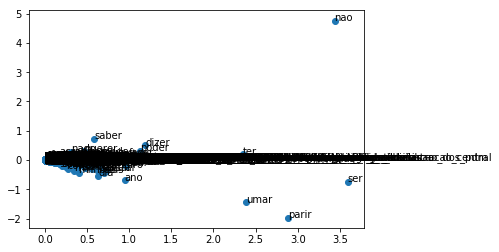

In [262]:
%matplotlib inline

plt.figure()
plt.scatter(dtm_lsa[:,0], dtm_lsa[:, 1])
for i, word in enumerate(vectorizer.get_feature_names()):
    plt.annotate(s = word, xy=dtm_lsa[i,:])
plt.show()